In [1]:
# T-mondy 사이트 https://pay.tmoney.co.kr/index.dev
# 교통카드 통계자료에서 excel 데이터 받기
# 데이터 정리 : 교재 63-65 

In [2]:
import csv # 읽어만 보겠다. # pandas는 메모리에 계속 가지고 있으나, csv는 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 07 ~ 09시 승차인원 최대 많은 역

In [3]:
f = open("subwaytime.csv")
data  = csv.reader(f)
# data  <_csv.reader at 0x95e7868>
# list(data) # list(data) #출력하면 데이터가 메모리에서 없어짐 아래
#print(len(list(data))) #출력하면  아래 실행안됨 메모리에서 사라짐

next(data) # 한줄recode  건너뛰기
next(data) # 또 한줄 recode 건너뛰기

# 07 ~ 9시 시간대 승차인원 더하기 <==엑셀에서 파악
# 최댓값을 갖는 역 찾기
mx = 0
result=[] 

for row in data: # data 문자
    #print(row[4:])
    #print(row)
    
    #column 4번째부터 int형으로 변환하여 덮어쓰기
    row[4:] = map(int, row[4:])
    
    #row[10] 의미파악 : 07:00:00~07:59:59 시간대 현황 <=== 엑셀에서 파악해야 함
    #result.append(row[10])
    
    #07 ~ 9시 시간대 승차인원 더하기
    #result.append(sum(row[10:15:2])) # 엑셀에서 보면 2칸씩
    
    if sum(row[10:15:2]) > mx :
        mx = sum(row[10:15:2])
        result = row[3] + '(' + row[1] +')' # row[3] 지하철역 column  #row[1] 호선명
        
print(mx)    
print(result)
#print(len(result))
#print(result)
    

809541
신림(2호선)



## 시간대별 가장 많이 타고 내리는 역

In [4]:
# 원하는 column index 찾기 위한 test      4승  4하  5승  5하
data = [[ '1월', '1호선', '01', '서울역', 100, 200, 300, 400],
        [ '1월', '1호선', '02', '용산역', 300, 700, 200, 500],
        [ '1월', '1호선', '03', '신림역', 200, 800, 100, 200]]        
def station():
    mx=[0]*24
    result=['']*24
    for row in data:
        print(f'row:{row}')
        for j in range(2):
            print(f'j={j}')
            print(f'j*2+4 : {j*2+4}')
            a=row[j*2+4]
            print(f'0:mx{j} : {mx[j]}')
            if a > mx[j]:
                mx[j] = a
                result[j] = row[3] +'(' + str(j+4) +')'# row[3] 지하철역 # '(' + str(j+4) +')' 시간대
        print("="*50)
    print(mx)
    print(result)
#station()

In [5]:
f = open("subwaytime.csv")
data  = csv.reader(f)
next(data) 
next(data) 

mx = [0]*24
result=['']*24 

for row in data: # data 문자
    #column 4번째부터 int형으로 변환하여 덮어쓰기
    row[4:] = map(int, row[4:])

    for j in range(24):
        a = row[j*2 + 4]
        if a > mx[j]:
            mx[j] = a
            result[j] = row[3]+'(' + str(j+4) +')' # row[3] 지하철역  # 시간추가 '(' + str(j+4) +')'
print(mx)    
print(result)
#print(len(result))
#print(result)
    

[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]
['구로(4)', '홍대입구(5)', '신림(6)', '신림(7)', '신림(8)', '신림(9)', '신림(10)', '신림(11)', '강남(12)', '강남(13)', '강남(14)', '강남(15)', '강남(16)', '강남(17)', '강남(18)', '강남(19)', '강남(20)', '강남(21)', '강남(22)', '강남(23)', '강남(24)', '강남(25)', '성신여대입구(돈암)(26)', '신방화(27)']


In [6]:
# # 한글깨짐
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# #print(font_list[:10])
# print ('설정파일 위치: ', mpl.matplotlib_fname())

# font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
# mpl.rc('font', family=font_name)

# # size, family
# print('# 설정 되어있는 폰트 사이즈')
# print (plt.rcParams['font.size'] ) 
# print('# 설정 되어있는 폰트 글꼴')
# print (plt.rcParams['font.family'] )

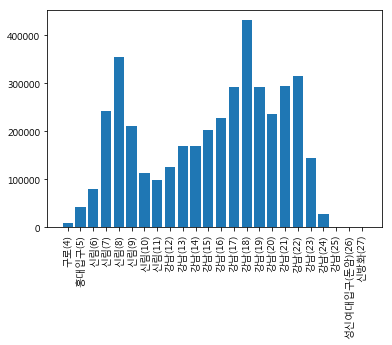

In [7]:
#한글 
plt.rc('font', family='Malgun Gothic')

plt.figure(dpi = 300) # figsize=(8,6) # dpi 해상도임  # dp 상관없이 똑같이 보이게끔 하는 옵션 ==> 게임이나 모바일에서사용 python지원안됨
plt.bar(range(24),mx)
plt.xticks(range(24), result, rotation=90) # xticks : x축 # rotation 세로
plt.show()

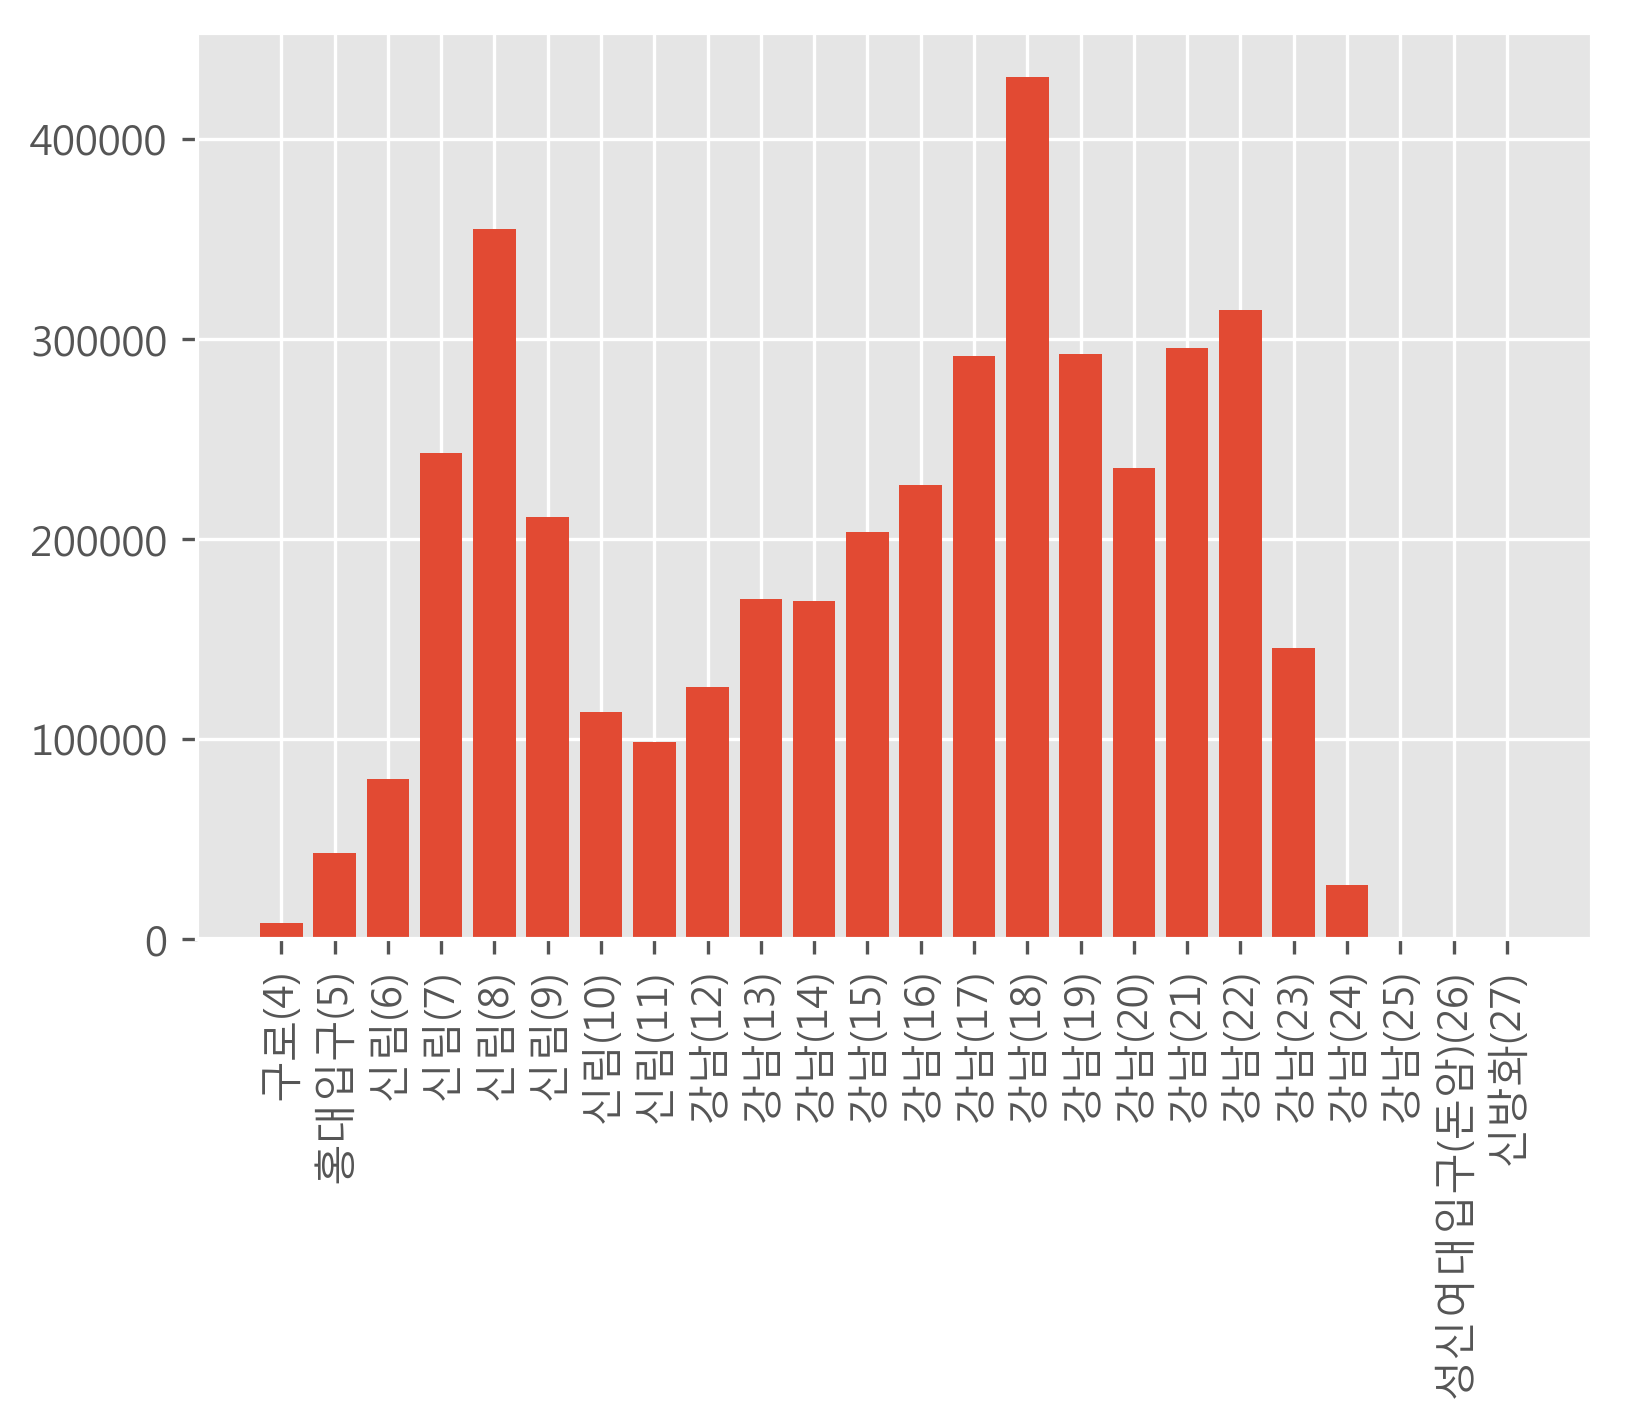

In [8]:
# R 스타일 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.rc('font', family='Malgun Gothic')
plt.figure(dpi = 300) # figsize=(8,6) 
plt.bar(range(24),mx)
plt.xticks(range(24), result, rotation=90) # xticks : x축 # rotation 세로
plt.show()